In [1]:
import numpy as np
from qiskit import(
    QuantumCircuit,   #holds all Quantum operations
    execute,          #executes circuit
    Aer               #handles simluator backends
)
from qiskit.visualization import plot_histogram   #creates histogram

In [2]:
circuit = QuantumCircuit(2,2) #QuantumCircuit(#ofqbits,#ofcbits)
print(circuit)
#q are qubits, c are classic bits

        
q_0: |0>
        
q_1: |0>
        
 c_0: 0 
        
 c_1: 0 
        


In [3]:
circuit.h(0)
print(circuit)
#A Hadamard gate H is created on qubit 0
#which puts it into a superposition state.

        ┌───┐
q_0: |0>┤ H ├
        └───┘
q_1: |0>─────
             
 c_0: 0 ═════
             
 c_1: 0 ═════
             


In [4]:
circuit.cx(0,1)
print(circuit)
#A controlled-Not operation Cx is created on control qubit 0
#and target qubit 1, putting the qubits in an entangled state.

        ┌───┐     
q_0: |0>┤ H ├──■──
        └───┘┌─┴─┐
q_1: |0>─────┤ X ├
             └───┘
 c_0: 0 ══════════
                  
 c_1: 0 ══════════
                  


In [5]:
circuit.measure([1,1],[0,1])
print(circuit)

        ┌───┐           
q_0: |0>┤ H ├──■────────
        └───┘┌─┴─┐┌─┐┌─┐
q_1: |0>─────┤ X ├┤M├┤M├
             └───┘└╥┘└╥┘
 c_0: 0 ═══════════╩══╬═
                      ║ 
 c_1: 0 ══════════════╩═
                        


In [7]:
circuit.measure([0,0],[1,0])

In [8]:
circuit.h(1)
print(circuit)

        ┌───┐           ┌─┐     ┌─┐
q_0: |0>┤ H ├──■────────┤M├─────┤M├
        └───┘┌─┴─┐┌─┐┌─┐└╥┘┌───┐└╥┘
q_1: |0>─────┤ X ├┤M├┤M├─╫─┤ H ├─╫─
             └───┘└╥┘└╥┘ ║ └───┘ ║ 
 c_0: 0 ═══════════╩══╬══╬═══════╩═
                      ║  ║         
 c_1: 0 ══════════════╩══╩═════════
                                   


In [9]:
circuit.cx(1,0)

In [10]:
print(circuit)

        ┌───┐           ┌─┐     ┌─┐┌───┐
q_0: |0>┤ H ├──■────────┤M├─────┤M├┤ X ├
        └───┘┌─┴─┐┌─┐┌─┐└╥┘┌───┐└╥┘└─┬─┘
q_1: |0>─────┤ X ├┤M├┤M├─╫─┤ H ├─╫───■──
             └───┘└╥┘└╥┘ ║ └───┘ ║      
 c_0: 0 ═══════════╩══╬══╬═══════╩══════
                      ║  ║              
 c_1: 0 ══════════════╩══╩══════════════
                                        


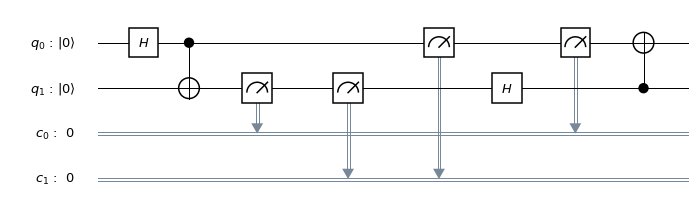

In [11]:
circuit.draw(output='mpl')

In [12]:
simulator = Aer.get_backend('qasm_simulator')
print(simulator)

qasm_simulator


In [13]:
job = execute(circuit, simulator, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'11': 518, '00': 482}


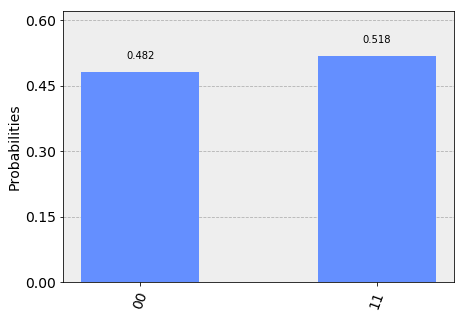

In [14]:
plot_histogram(counts)